### A finance company wants to classify weather the person is eligible to get loan or not eligible. So when a customer fills online application, company wants to automate the loan based on some variables. Here let's help the company and make their work easy.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading dataset

In [2]:
df=pd.read_csv("Homeloanpredection_dataset.csv")

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Data Preprocessing 

Here we'll remove null values because they may effect the accuracy of our model

In [6]:
df.isnull().sum().sum()

149

There are 149 null values in total dataset. 

So Now let's check null values column wise

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Now let's fill the null values in the different columns 

In [8]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

Filling null values of numerical columns with mean and catagorical columns with mode values.

In [9]:
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

Now we've filled the null values for numerical data using mean and catagorical data using mode

In [10]:
df.isnull().sum().sum()

0

## Variable Analysis

In [11]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

C:\Users\GUDURI MANISH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

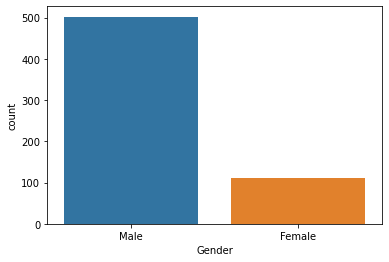

In [12]:
sns.countplot(df['Gender'])

<AxesSubplot:title={'center':'Gender'}>

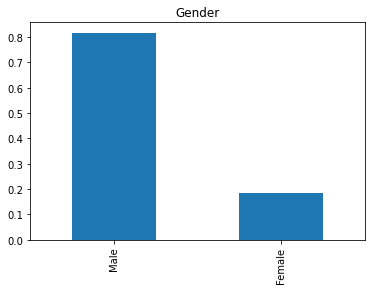

In [13]:
df["Gender"].value_counts(normalize=True).plot.bar(title = 'Gender')

In [14]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

C:\Users\GUDURI MANISH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

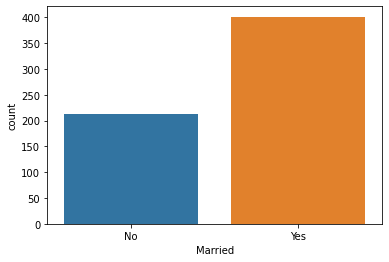

In [15]:
sns.countplot(df['Married'])

<AxesSubplot:title={'center':'Married'}>

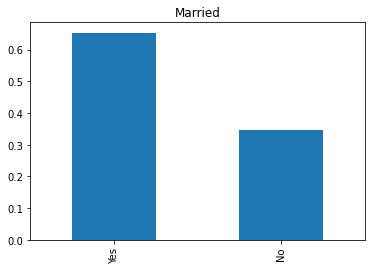

In [16]:
df["Married"].value_counts(normalize=True).plot.bar(title = 'Married')

C:\Users\GUDURI MANISH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

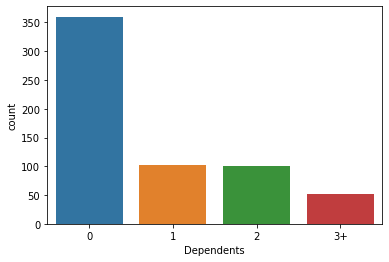

In [17]:
sns.countplot(df['Dependents'])

<AxesSubplot:title={'center':'Dependents'}>

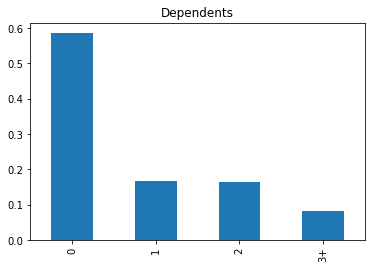

In [18]:
df["Dependents"].value_counts(normalize=True).plot.bar(title = 'Dependents')

In [19]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

C:\Users\GUDURI MANISH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

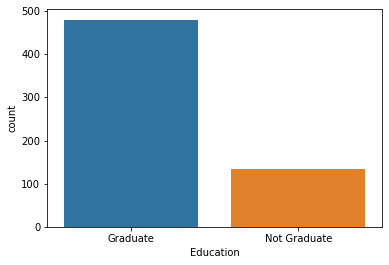

In [20]:
sns.countplot(df['Education'])

<AxesSubplot:title={'center':'Education'}>

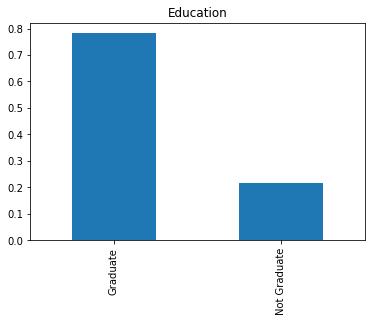

In [21]:
df["Education"].value_counts(normalize=True).plot.bar(title = 'Education')

In [22]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

C:\Users\GUDURI MANISH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

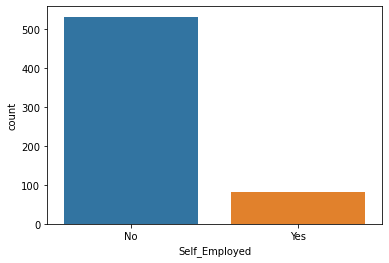

In [23]:
sns.countplot(df['Self_Employed'])

<AxesSubplot:title={'center':'Self_Employed'}>

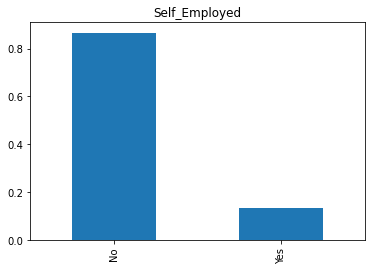

In [24]:
df["Self_Employed"].value_counts(normalize=True).plot.bar(title = 'Self_Employed')

In [25]:
df['Credit_History'].value_counts()

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64

C:\Users\GUDURI MANISH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

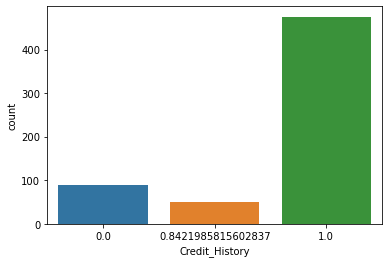

In [26]:
sns.countplot(df['Credit_History'])

<AxesSubplot:title={'center':'Credit_History'}>

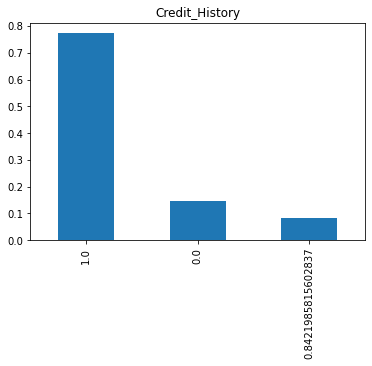

In [27]:
df["Credit_History"].value_counts(normalize=True).plot.bar(title = 'Credit_History')

In [28]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

C:\Users\GUDURI MANISH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

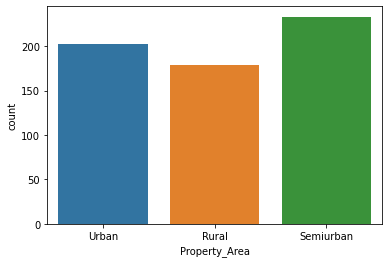

In [29]:
sns.countplot(df['Property_Area'])

<AxesSubplot:title={'center':'Property_Area'}>

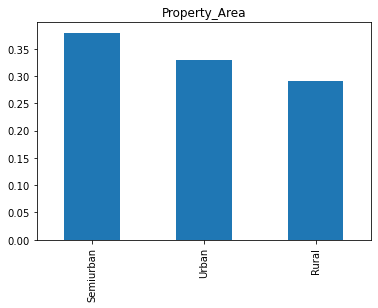

In [30]:
df["Property_Area"].value_counts(normalize=True).plot.bar(title = 'Property_Area')

In [31]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

C:\Users\GUDURI MANISH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

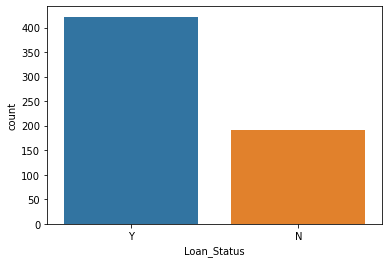

In [32]:
sns.countplot(df['Loan_Status'])

<AxesSubplot:title={'center':'Loan_Status'}>

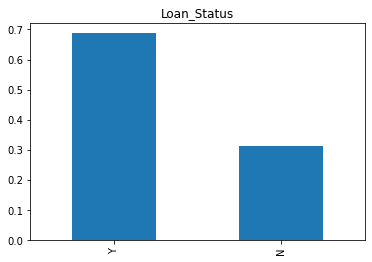

In [33]:
df["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status')

C:\Users\GUDURI MANISH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

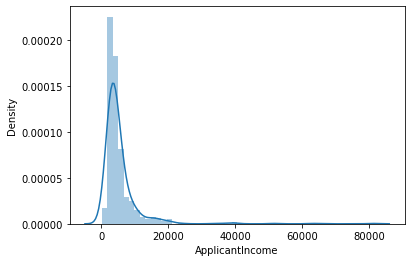

In [34]:
plt.figure()
sns.distplot(df["ApplicantIncome"])

C:\Users\GUDURI MANISH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

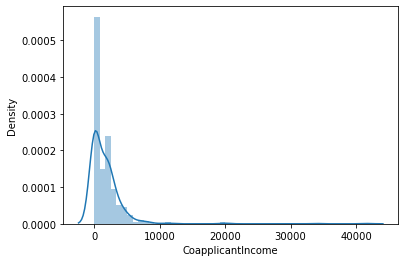

In [35]:
sns.distplot(df["CoapplicantIncome"])

C:\Users\GUDURI MANISH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

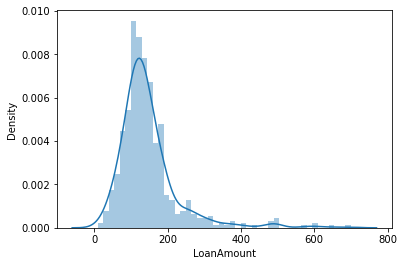

In [36]:
sns.distplot(df["LoanAmount"])

C:\Users\GUDURI MANISH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

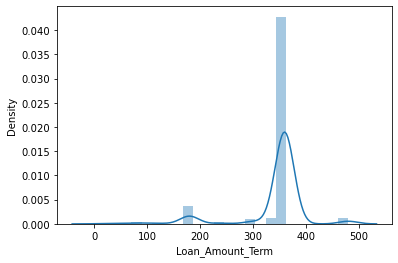

In [37]:
sns.distplot(df['Loan_Amount_Term'])

C:\Users\GUDURI MANISH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

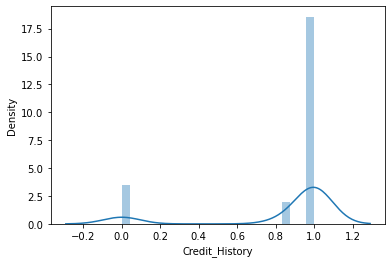

In [38]:
sns.distplot(df['Credit_History'])

Creating Total income by summing up application income and co-applicant income

In [39]:
df['Total_income']=df['ApplicantIncome'] + df['CoapplicantIncome']

In [40]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,9613.0
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y,3849.0
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N,5540.0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y,5532.0
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N,23809.0


C:\Users\GUDURI MANISH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_income', ylabel='Density'>

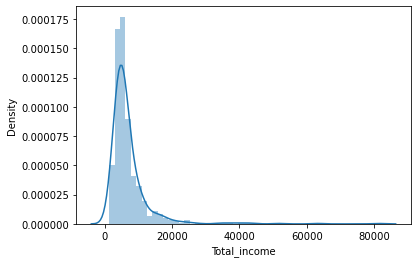

In [41]:
sns.distplot(df['Total_income'])

## Log Transformation

C:\Users\GUDURI MANISH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome_Log', ylabel='Density'>

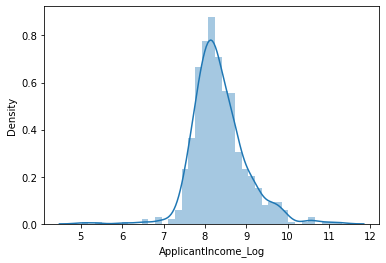

In [42]:
df['ApplicantIncome_Log'] = np.log(df['ApplicantIncome']+1)
sns.distplot(df["ApplicantIncome_Log"])

C:\Users\GUDURI MANISH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome_Log', ylabel='Density'>

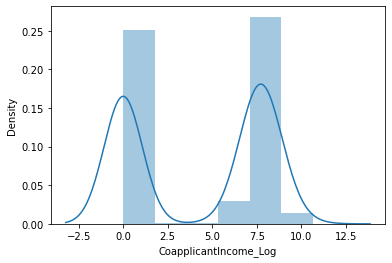

In [43]:
df['CoapplicantIncome_Log'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df["CoapplicantIncome_Log"])

C:\Users\GUDURI MANISH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount_Log', ylabel='Density'>

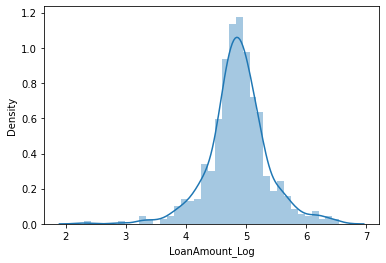

In [44]:
df['LoanAmount_Log'] = np.log(df['LoanAmount']+1)
sns.distplot(df["LoanAmount_Log"])

C:\Users\GUDURI MANISH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

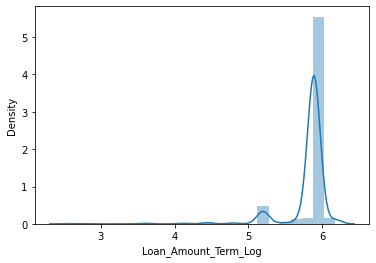

In [45]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df["Loan_Amount_Term_Log"])

C:\Users\GUDURI MANISH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

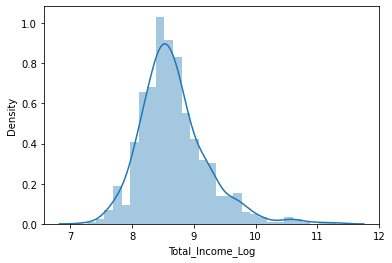

In [46]:
df['Total_Income_Log'] = np.log(df['Total_income']+1)
sns.distplot(df["Total_Income_Log"])

In [47]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income,ApplicantIncome_Log,CoapplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log,Total_Income_Log
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477,0.893037,0.790658,-0.250433,0.436606,-0.024347,0.717856
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.342781,-0.237860,0.573648,0.204492,-0.043119,0.383831
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738,0.620102,0.551656,0.047522,0.897671,0.044905,0.687560
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.069830,-0.030741,0.013613,0.085940,0.940881,-0.055321
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.014447,0.019183,0.002384,-0.024909,-0.007773,0.019154
Total_income,0.893037,0.342781,0.620102,-0.069830,-0.014447,1.000000,0.640090,0.023028,0.505622,-0.042566,0.852901
ApplicantIncome_Log,0.790658,-0.237860,0.551656,-0.030741,0.019183,0.640090,1.000000,-0.368258,0.492560,-0.014723,0.740402
CoapplicantIncome_Log,-0.250433,0.573648,0.047522,0.013613,0.002384,0.023028,-0.368258,1.000000,0.130524,0.012895,0.149070
LoanAmount_Log,0.436606,0.204492,0.897671,0.085940,-0.024909,0.505622,0.492560,0.130524,1.000000,0.084301,0.658957
Loan_Amount_Term_Log,-0.024347,-0.043119,0.044905,0.940881,-0.007773,-0.042566,-0.014723,0.012895,0.084301,1.000000,-0.029705


<AxesSubplot:>

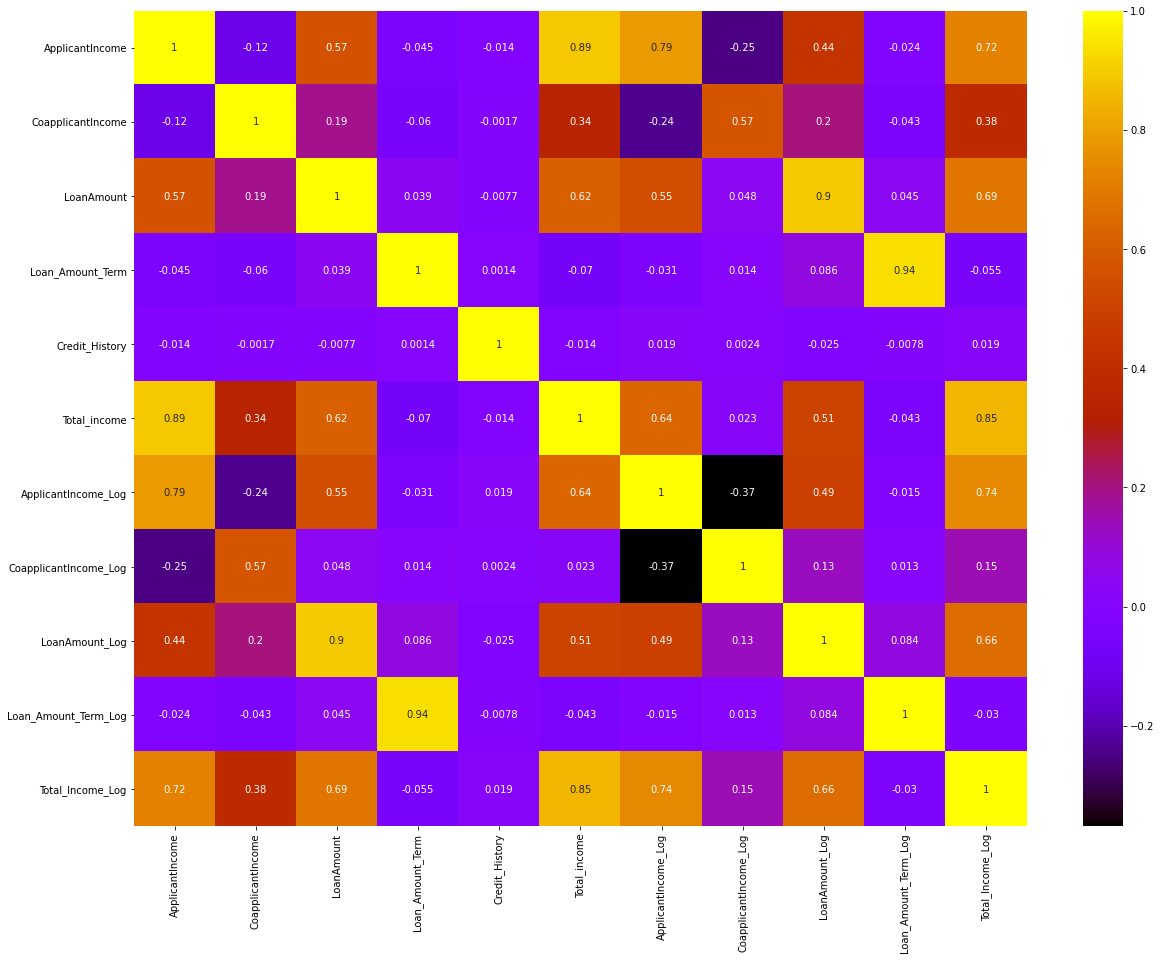

In [48]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='gnuplot')

As we created log variables of some variables, let's drop the original variables.

In [49]:
df=df.drop(['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_income", 'Loan_ID', 'CoapplicantIncome'],axis=1)

## Label Encoding

Here we'll convert the catagorical data to numerical data using label encoding

In [50]:

from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [51]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Log,CoapplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,0.000000,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,7.319202,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,0.000000,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,7.765993,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,0.000000,4.955827,5.888878,8.699681
5,1,1,2,0,1,1.0,2,1,8.597482,8.342125,5.590987,5.888878,9.170976
6,1,1,0,1,0,1.0,2,1,7.755339,7.324490,4.564348,5.888878,8.255828
7,1,1,3,0,0,0.0,1,0,8.018625,7.826044,5.068904,5.888878,8.619930
8,1,1,2,0,0,1.0,2,1,8.295798,7.331060,5.129899,5.888878,8.618485
9,1,1,1,0,0,1.0,1,0,9.460476,9.302828,5.857933,5.888878,10.077861


## Model Training

Here let's train and test the following models and check the results of corresponding accuracy scores
- LogisticRegression

- DecisionTreeClassifier

- RandomForestClassifier

- ExtraTreesClassifier

In [52]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [53]:
from sklearn.model_selection import train_test_split
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 81.16883116883116


C:\Users\GUDURI MANISH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 75.32467532467533


In [56]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 77.92207792207793


In [57]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 76.62337662337663


We can see that logistic regression fits the model better than the other classification models

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [59]:
x_train.shape

(460, 12)

In [60]:
x_test.shape

(154, 12)

In [61]:
y_train.shape


(460,)

In [62]:
y_test.shape

(154,)

In [63]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome_Log,CoapplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log,Total_Income_Log
98,1,1,0,1,0,1.000000,1,8.340217,0.000000,4.753590,5.198497,8.340217
135,1,1,3,0,0,1.000000,1,8.294300,8.955577,5.673323,5.888878,9.371694
290,1,1,0,0,0,1.000000,0,8.031385,7.790282,4.941642,5.888878,8.611048
560,1,1,2,1,0,1.000000,1,8.209580,5.493061,4.691348,5.888878,8.273337
133,1,1,0,0,1,1.000000,1,8.149024,0.000000,3.258097,4.795791,8.149024
...,...,...,...,...,...,...,...,...,...,...,...,...
440,1,0,0,0,0,1.000000,1,8.205492,8.530109,5.236442,5.888878,9.073948
165,1,1,0,0,0,1.000000,0,8.218248,8.060540,5.209486,5.837730,8.835501
7,1,1,3,0,0,0.000000,1,8.018625,7.826044,5.068904,5.888878,8.619930
219,0,1,2,0,0,0.842199,1,8.362642,7.776535,4.852030,5.888878,8.804925


In [64]:
a=LogisticRegression()
a

LogisticRegression()

In [65]:
a.fit(x_train,y_train)

C:\Users\GUDURI MANISH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
y_predict=a.predict(x_test)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [67]:
x_test.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome_Log,CoapplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log,Total_Income_Log
439,0,1,0,1,1,1.000000,0,8.873888,0.000000,4.934474,5.888878,8.873888
348,1,1,0,0,0,0.842199,1,8.753687,8.430327,5.560682,5.888878,9.298076
459,1,1,0,0,0,1.000000,1,9.028219,0.000000,5.081404,5.888878,9.028219


In [68]:
y.head(3)

0    1
1    0
2    1
Name: Loan_Status, dtype: int32

In [69]:
a.predict([[0,1,0,1,1,1.000000,0,8.87388,0.000000,4.934474,5.888878,8.873888]])

array([1])

In [70]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_predict})
df

,Real Values,Predicted Values
439,1,1
348,1,1
459,0,1
71,1,1
51,1,1
...,...,...
168,0,0
66,0,0
161,0,1
557,1,1
